In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as spstats

%matplotlib inline

In [2]:
! ls ..

aula1  aula2  aula3  aula4  data  Manual_features_tentative.ipynb


In [3]:
tit = pd.read_csv('../data/train.csv')

In [4]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tit.Age.max()

80.0

In [6]:
#funcao tosca pra binnar idades

i = 7
arbitrary_jump = 7
tit['binAge'] = 0 # inicializa a coluna

while i < tit['Age'].max():
    mask = tit['Age'] > i
    tit.loc[mask, 'binAge'] += 1
    i += arbitrary_jump

In [7]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [8]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=2) # threshold == cutoff
                                # por alguma razao esse bin soh aceita 2 bins
dumb_stuff = bn.transform([tit['Pclass']])[0]
tit['dumbstuff'] = dumb_stuff
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binAge,dumbstuff
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,1


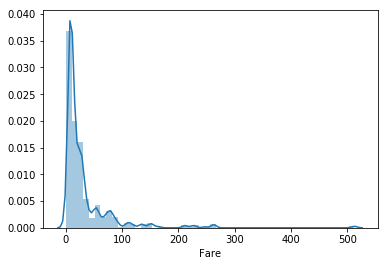

In [9]:
import pandas as pd
import seaborn as sns
sns.distplot(tit['Fare'])

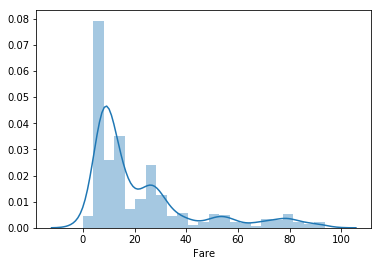

In [10]:
oi = tit[tit['Fare'] < 100]
sns.distplot(oi['Fare'])

In [11]:
# meio ridiculo colocar essa galera da parte gorda como 10% de riqueza 
# só porque nossa distribuição claramente tem outliers
display(
    tit[tit['Fare'] > 300].count()[0],
    tit[tit['Fare'] > 200].count()[0],
    tit[tit['Fare'] > 100].count()[0],
)

3

20

53

In [12]:
tit.count()[0]

891

In [13]:
# Olha, provavelmente o que acontece pra alguem que pagou 200 tbm acontece pra alguem que pagou 500
mask = tit['Fare'] > 200

Fare_binning = tit['Fare'] / 200
tit['Fare_binning (ordinal)'] = np.array(
                                   np.round(Fare_binning * 10),
                                    dtype='int')
tit.loc[mask, 'Fare_binning (ordinal)'] = 10    

In [14]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binAge,dumbstuff,Fare_binning (ordinal)
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,1,0


In [15]:
np.std(tit['Fare'])
#standard deviation

49.6655344447741

In [16]:
# pra pegar a quantas std alguem ta da distribuição:
def get_naolembro(numeric_series):
    mean = numeric_series.mean()
    std = np.std(numeric_series)
    output = (numeric_series - mean) / std
    return output

In [17]:
tit['Fare_std'] = get_naolembro(tit['Fare'])

In [18]:
tit [ [ 'Fare' , 'Fare_std' ] ].sort_values(ascending=False, by='Fare').head()

,Fare,Fare_std
258,512.3292,9.667167
737,512.3292,9.667167
679,512.3292,9.667167
88,263.0000,4.647001
27,263.0000,4.647001


In [19]:
tit.Fare.mean()

32.204207968574636

In [20]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binAge,dumbstuff,Fare_binning (ordinal),Fare_std
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1,0,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,0,4,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1,0,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,0,3,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,1,0,-0.486337


In [21]:
tit.loc[tit['Fare'] > 300, {'Name','Fare','Fare_std'}]

,Fare_std,Name,Fare
258,9.667167,"Ward, Miss. Anna",512.3292
679,9.667167,"Cardeza, Mr. Thomas Drake Martinez",512.3292
737,9.667167,"Lesurer, Mr. Gustave J",512.3292


In [22]:
tit['Age_std'] = get_naolembro(tit['Age'])

In [23]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binAge,dumbstuff,Fare_binning (ordinal),Fare_std,Age_std
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1,0,-0.502445,-0.530377
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,0,4,0.786845,0.571831
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1,0,-0.488854,-0.254825
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,0,3,0.420730,0.365167
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,1,0,-0.486337,0.365167


In [24]:
#ta, mas de que adianta? std ainda tá dado continuo

# E foi nesse ponto que eu descobri que data continuo pode entrar na tabela

## Oh well, vida que segue

In [25]:
# Yet another jeito de fazer bins

bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

tit['Age_bin_custom_range'] = pd.cut(
                                   np.array(
                                      tit['Age']), 
                                      bins=bin_ranges)
tit['Age_bin_custom_label'] = pd.cut(
                                   np.array(
                                      tit['Age']), 
                                      bins=bin_ranges,            
                                      labels=bin_names)

In [26]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = tit['Age'].quantile(quantile_list)
quantiles

0.00     0.420
0.25    20.125
0.50    28.000
0.75    38.000
1.00    80.000
Name: Age, dtype: float64

In [27]:
tit['outro_bin_de_idade'] = pd.qcut(
                                tit['Age'], 
                                q=quantile_list,
                                labels = ['1', '2', '3', '4'])

In [28]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binAge,dumbstuff,Fare_binning (ordinal),Fare_std,Age_std,Age_bin_custom_range,Age_bin_custom_label,outro_bin_de_idade
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,1,0,-0.502445,-0.530377,"(15, 30]",2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,0,4,0.786845,0.571831,"(30, 45]",3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1,0,-0.488854,-0.254825,"(15, 30]",2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,0,3,0.420730,0.365167,"(30, 45]",3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,1,0,-0.486337,0.365167,"(30, 45]",3,3


In [29]:
# um problema que ta começando a aparecer na minha vida é que 
# pd, np, scikit tem metodos redundantes entre si

In [30]:
# com familia ou sem?
tit['Alone']=tit.SibSp + tit.Parch
tit['Alone'].loc[tit['Alone']>0]=0
tit['Alone'].loc[tit['Alone']==0]=1

/home/gabriel/anaconda3/envs/Kaggle_Santander/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,binAge,dumbstuff,Fare_binning (ordinal),Fare_std,Age_std,Age_bin_custom_range,Age_bin_custom_label,outro_bin_de_idade,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,3,1,0,-0.502445,-0.530377,"(15.0, 30.0]",2,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,5,0,4,0.786845,0.571831,"(30.0, 45.0]",3,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,3,1,0,-0.488854,-0.254825,"(15.0, 30.0]",2,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,4,0,3,0.420730,0.365167,"(30.0, 45.0]",3,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,4,1,0,-0.486337,0.365167,"(30.0, 45.0]",3,3,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,0,1,0,-0.478116,NaN,NaN,NaN,NaN,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,7,0,3,0.395814,1.674039,"(45.0, 60.0]",4,4,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,0,1,1,-0.224083,-1.908136,"(0.0, 15.0]",1,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,3,1,1,-0.424256,-0.185937,"(15.0, 30.0]",2,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,1,0,2,-0.042956,-1.081480,"(0.0, 15.0]",1,1,1


In [32]:
tit.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [33]:
name = 'Allen, Mr. William Henry'
name.split(',')[1].split('.')[0].strip()

'Mr'

In [34]:
# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# VIagem astral

In [35]:
oi = ('oi', 8)
type(oi)

tuple

In [36]:
hey = set([i for i in range(10)])
type(hey)

set

In [37]:
hey

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [38]:
hey.add(23)

In [39]:
hey

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 23}

In [40]:
0 in hey

True

In [41]:
hey.add(9)

In [42]:
hey

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 23}

In [43]:
p = [1,2,3,4,5,]

In [44]:
p

[1, 2, 3, 4, 5]

In [45]:
variavel = 0

In [46]:
p = [yt for yt in range(5)]

In [47]:
p

[0, 1, 2, 3, 4]

In [48]:
iterable(p)

NameError: name 'iterable' is not defined

In [54]:
type(p)

list

In [55]:
yu = lambda x: x%2

In [56]:
list(map(yu, p))

[0, 1, 0, 1, 0]

In [57]:
tit.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,binAge,dumbstuff,Fare_binning (ordinal),Fare_std,Age_std,Age_bin_custom_range,Age_bin_custom_label,outro_bin_de_idade,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,3,1,0,-0.502445,-0.530377,"(15, 30]",2,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,5,0,4,0.786845,0.571831,"(30, 45]",3,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,3,1,0,-0.488854,-0.254825,"(15, 30]",2,2,1


# Retorno

In [58]:
# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [59]:
# A list with the all the different titles
titles = sorted(set([x for x in tit.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

Different titles found on the dataset:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']



In [60]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [61]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,binAge,dumbstuff,Fare_binning (ordinal),Fare_std,Age_std,Age_bin_custom_range,Age_bin_custom_label,outro_bin_de_idade,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,3,1,0,-0.502445,-0.530377,"(15, 30]",2,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,5,0,4,0.786845,0.571831,"(30, 45]",3,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,3,1,0,-0.488854,-0.254825,"(15, 30]",2,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,4,0,3,0.420730,0.365167,"(30, 45]",3,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,4,1,0,-0.486337,0.365167,"(30, 45]",3,3,1


In [62]:
tit['Title'] = tit['Name'].map(lambda x: get_title(x))

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
tit['Title'] = tit.apply(replace_titles, axis=1)

In [63]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,binAge,dumbstuff,Fare_binning (ordinal),Fare_std,Age_std,Age_bin_custom_range,Age_bin_custom_label,outro_bin_de_idade,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,3,1,0,-0.502445,-0.530377,"(15, 30]",2,2,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,5,0,4,0.786845,0.571831,"(30, 45]",3,3,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,3,1,0,-0.488854,-0.254825,"(15, 30]",2,2,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,4,0,3,0.420730,0.365167,"(30, 45]",3,3,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,4,1,0,-0.486337,0.365167,"(30, 45]",3,3,1,Mr


In [64]:
tit['Relatives'] = tit['Parch'] + tit['SibSp']

## Cansei desse negocio, vamo fazer a feature matrix

In [65]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'binAge', 'dumbstuff',
       'Fare_binning (ordinal)', 'Fare_std', 'Age_std', 'Age_bin_custom_range',
       'Age_bin_custom_label', 'outro_bin_de_idade', 'Alone', 'Title',
       'Relatives'],
      dtype='object')

In [66]:
inuteis = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'dumbstuff',
                'Age_bin_custom_range', 'Age_bin_custom_label', 'outro_bin_de_idade']
ordinais = ['Pclass', 'Fare_binning (ordinal)']
categoricas = ['Sex', 'Embarked', 'binAge', 'Alone', 'Title']
entra_assim_msm = ['Age', 'Relatives', 'Fare', 'Fare_std', 'Age_std', 'Relatives']
y = ['Survived']

In [67]:
tit = tit.drop(inuteis, axis=1)
tit.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,binAge,Fare_binning (ordinal),Fare_std,Age_std,Alone,Title,Relatives
0,0,3,male,22.0,7.2500,S,3,0,-0.502445,-0.530377,1,Mr,1
1,1,1,female,38.0,71.2833,C,5,4,0.786845,0.571831,1,Mrs,1
2,1,3,female,26.0,7.9250,S,3,0,-0.488854,-0.254825,1,Miss,0
3,1,1,female,35.0,53.1000,S,4,3,0.420730,0.365167,1,Mrs,1
4,0,3,male,35.0,8.0500,S,4,0,-0.486337,0.365167,1,Mr,0


In [68]:
feature_matrix = pd.get_dummies(tit, columns=categoricas, drop_first=True)

In [69]:
tit.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [70]:
feature_matrix.head()

,Survived,Pclass,Age,Fare,Fare_binning (ordinal),Fare_std,Age_std,Relatives,Sex_male,Embarked_Q,...,binAge_5,binAge_6,binAge_7,binAge_8,binAge_9,binAge_10,binAge_11,Title_Miss,Title_Mr,Title_Mrs
0,0,3,22.0,7.2500,0,-0.502445,-0.530377,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,38.0,71.2833,4,0.786845,0.571831,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,3,26.0,7.9250,0,-0.488854,-0.254825,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,35.0,53.1000,3,0.420730,0.365167,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,8.0500,0,-0.486337,0.365167,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
feature_matrix.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Fare_binning (ordinal)',
       'Fare_std', 'Age_std', 'Relatives', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'binAge_1', 'binAge_2', 'binAge_3', 'binAge_4',
       'binAge_5', 'binAge_6', 'binAge_7', 'binAge_8', 'binAge_9', 'binAge_10',
       'binAge_11', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [72]:
# bom o suficiente

In [73]:
result = tit['Survived']

In [74]:
feature_matrix = feature_matrix.drop('Survived', axis=1)
feature_matrix.head()

,Pclass,Age,Fare,Fare_binning (ordinal),Fare_std,Age_std,Relatives,Sex_male,Embarked_Q,Embarked_S,...,binAge_5,binAge_6,binAge_7,binAge_8,binAge_9,binAge_10,binAge_11,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,7.2500,0,-0.502445,-0.530377,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,38.0,71.2833,4,0.786845,0.571831,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,26.0,7.9250,0,-0.488854,-0.254825,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,35.0,53.1000,3,0.420730,0.365167,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,8.0500,0,-0.486337,0.365167,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [75]:
mask = feature_matrix.Age.notna()
feature_matrix = feature_matrix[mask]

In [76]:
result = result[mask]

In [77]:
display(feature_matrix.shape, result.shape)

(714, 24)

(714,)

In [78]:
pd.Series([1, -4, 2]).apply(lambda x: abs(x))

0    1
1    4
2    2
dtype: int64

# tira isso depois eh soh pelo hue

In [79]:
feature_matrix.columns

feature_matrix['Fare_std'] = feature_matrix['Fare_std'].apply(lambda x: abs(x)) 
feature_matrix['Age_std'] = feature_matrix['Fare_std'].apply(lambda x: abs(x)) 

### Mano, tem que consertar isso de outra forma, provavelmente catando um modelo que aceite

# FIm do hue

In [80]:
from sklearn.naive_bayes import MultinomialNB
modelo = MultinomialNB()
modelo.fit(feature_matrix, result)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
! ls ..

aula1  aula2  aula3  aula4  data  Manual_features_tentative.ipynb


In [82]:
teste = pd.read_csv('../data/test.csv')

In [83]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
feature_matrix.head()

,Pclass,Age,Fare,Fare_binning (ordinal),Fare_std,Age_std,Relatives,Sex_male,Embarked_Q,Embarked_S,...,binAge_5,binAge_6,binAge_7,binAge_8,binAge_9,binAge_10,binAge_11,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,7.2500,0,0.502445,0.502445,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,38.0,71.2833,4,0.786845,0.786845,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,26.0,7.9250,0,0.488854,0.488854,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,35.0,53.1000,3,0.420730,0.420730,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,8.0500,0,0.486337,0.486337,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [85]:
fm = make_alone(teste)

NameError: name 'make_alone' is not defined

In [86]:
fm['Relatives'] = fm['Parch'] + fm['SibSp']

NameError: name 'fm' is not defined

In [87]:
def whole_feature_process(df):
    inuteis = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
    ordinais = ['Pclass', 'Fare_binning']
    categoricas = ['Sex', 'Embarked', 'binAge', 'Alone', 'Title']
    entra_assim_msm = ['Age', 'Relatives', 'Fare', 'Fare_std', 'Age_std']
    y = ['Survived']
    
    fm = make_alone(df)
    fm = make_binAge(fm)
    fm = make_fare_binning(fm)
    fm['Relatives'] = fm['Parch'] + fm['SibSp']
    fm = get_col_title(fm)
    fm = get_std_stuff(fm, 'Fare')
    fm = get_std_stuff(fm, 'Age')
    
    df = df.drop(inuteis, axis=1)

    fm = pd.get_dummies(fm, columns=categoricas, drop_first=True)
    
    fm['Fare_std'] = fm['Fare_std'].apply(lambda x: abs(x)) 
    fm['Age_std'] = fm['Fare_std'].apply(lambda x: abs(x)) 
    
    return df

In [88]:
def make_fare_binning(df):
    mask = df['Fare'] > 200

    Fare_binning = df['Fare'] / 200
    df['Fare_binning'] = np.array(np.round(Fare_binning * 10),
                                    dtype='int')
    df.loc[mask, 'Fare_binning'] = 10 
    
    return df

In [89]:
def make_binAge(df):

    i = 7
    arbitrary_jump = 7
    df['binAge'] = 0 # inicializa a coluna

    while i < df['Age'].max():
        mask = df['Age'] > i
        df.loc[mask, 'binAge'] += 1
        i += arbitrary_jump
        
    return df

In [90]:
def make_alone(df):
    df['Alone'] = df.SibSp + df.Parch
    df['Alone'].loc[tit['Alone'] > 0] = 0
    df['Alone'].loc[tit['Alone'] == 0] = 1
    return df

In [91]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [92]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [93]:
def get_col_title(df):
    df['Title'] = df['Name'].map(lambda x: get_title(x))

    # And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
    df['Title'] = df.apply(replace_titles, axis=1)
    
    return df

In [94]:
# pra pegar a quantas std alguem ta da distribuição:
def get_std_stuff(df, col):
    mean = df[col].mean()
    std = np.std(df[col])
    new_name = f"{col}_std"
    df[new_name] = (df[col] - mean) / std
    return df

In [95]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
fm_teste = whole_feature_process(teste)

/home/gabriel/anaconda3/envs/Kaggle_Santander/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
fm_teste

,Pclass,Sex,Age,Fare,Embarked,Alone,binAge,Fare_binning,Relatives,Title,Fare_std,Age_std
0,3,male,34.5,7.8292,Q,0,4,0,0,Mr,-0.497811,0.298549
1,3,female,47.0,7.0000,S,0,6,0,1,Mrs,-0.512660,1.181328
2,2,male,62.0,9.6875,Q,0,8,0,0,Mr,-0.464532,2.240662
3,3,male,27.0,8.6625,S,0,3,0,0,Mr,-0.482888,-0.231118
4,3,female,22.0,12.2875,S,0,3,1,2,Mrs,-0.417971,-0.584229
5,3,male,14.0,9.2250,S,0,1,0,0,Mr,-0.472814,-1.149208
6,3,female,30.0,7.6292,Q,0,4,0,0,Miss,-0.501392,-0.019251
7,2,male,26.0,29.0000,S,0,3,1,2,Mr,-0.118681,-0.301740
8,3,female,18.0,7.2292,C,0,2,0,0,Mrs,-0.508555,-0.866718
9,3,male,21.0,24.1500,S,0,2,1,2,Mr,-0.205535,-0.654852


# e ai passa pelo processo denovo

# Na vdd, vou fazer em outro ipynb

In [99]:
# Pra testar o negocio depois
previsao = modelo.predict(fm_teste)

from sklearn import metrics

metrics.accuracy_score(y_teste, previsao)

ValueError: could not convert string to float: 'male'